In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/Nidhi/Desktop/Jupyter Notebooks/datasets/city_day.csv")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.apply(lambda x: sum(x.isnull()))

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
len(df)

29531

In [9]:
df.drop(['PM10','Xylene','NH3'],axis=1,inplace=True)

In [10]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.dtypes

City           object
Date           object
PM2.5         float64
NO            float64
NO2           float64
NOx           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
AQI           float64
AQI_Bucket     object
dtype: object

In [17]:
from sklearn.impute import SimpleImputer
import numpy as np

In [39]:
df[df.columns[2:12]]

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI
0,NaN,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,NaN
1,NaN,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,NaN
2,NaN,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,NaN
3,NaN,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,NaN
4,NaN,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,NaN
...,...,...,...,...,...,...,...,...,...,...
29526,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,12.07,41.0
29527,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,2.21,70.0
29528,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,0.01,68.0
29529,16.64,4.05,29.26,18.80,0.52,9.84,28.30,0.00,0.00,54.0


In [41]:
df.fillna(df.mean(),inplace=True)

In [42]:
df.apply(lambda x: sum(x.isnull()))

City             0
Date             0
PM2.5            0
NO               0
NO2              0
NOx              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI              0
AQI_Bucket    4681
dtype: int64

In [44]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,166.463581,NaN


In [45]:
import matplotlib.pyplot as plt

### Implemented only for Ahmedabad. Can be extended if required





Text(0.5, 1.0, 'Levels of types of nitrous oxides')

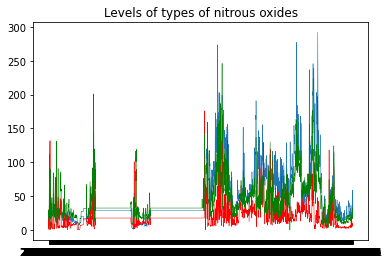

In [79]:
C=df[df['City']=='Ahmedabad']
plt.plot(C['Date'],C['NO2'],linewidth=0.5)
plt.plot(C['Date'],C['NO'],color='Red',linewidth=0.5)
plt.plot(C['Date'],C['NOx'],color='Green',linewidth=0.5)
plt.title("Levels of types of nitrous oxides")

In [71]:
materials = ['NO2', 'NO','NOx','CO','SO2','O3','Benzene']
x_pos = np.arange(len(materials))
CTEs = [C['NO2'].mean(), C['NO'].mean(),C['NOx'].mean(),C['CO'].mean(),C['SO2'].mean(),C['O3'].mean(),C['Benzene'].mean()]

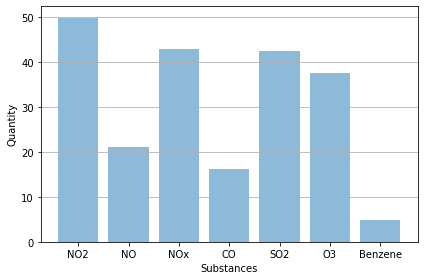

In [76]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Quantity')
ax.set_xlabel('Substances')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [85]:
labels=['NO2','NO','NOx','CO','SO2','O3','Benzene','Toluene']
sizes = [C['NO2'].mean(),C['NO'].mean(),C['NOx'].mean(),C['CO'].mean(),C['SO2'].mean(),C['O3'].mean(),C['Benzene'].mean(),C['Toluene'].mean()]

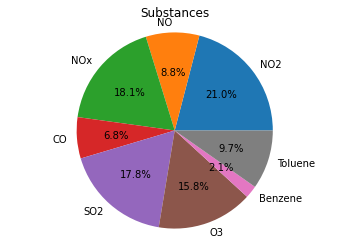

In [86]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal') 
ax.set_title('Substances')
plt.show()

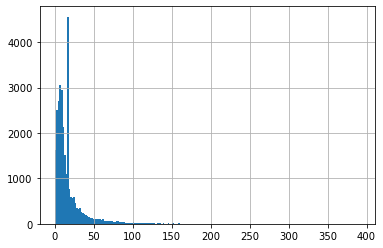

In [89]:
df['NO'].hist(bins=200)

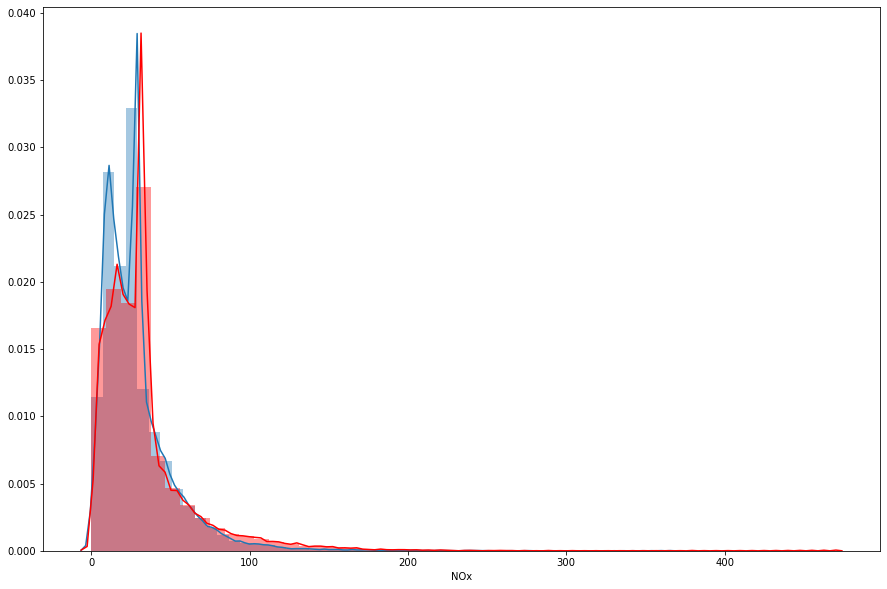

In [123]:
import seaborn as seabornInstance 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['NO2'])
seabornInstance.distplot(df['NOx'],color='Red')

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [135]:
X = df[['NO2','NO','NOx','CO','SO2','O3','Benzene','Toluene']].values
Y= df['AQI'].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
lm = LinearRegression()

In [138]:
lm.fit(x_train,y_train)

LinearRegression()

In [139]:
pred = lm.predict(x_test)

In [140]:
pred

array([311.68042114, 141.06117632, 111.59213392, ..., 139.91679012,
        96.78289032, 186.82796272])

In [141]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [143]:
comparison.head(5)

,Actual,Predicted
0,332.000000,311.680421
1,127.000000,141.061176
2,166.463581,111.592134
3,740.000000,599.521266
4,99.000000,129.915170
